<a href="https://colab.research.google.com/github/Khalil-Salama/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title:(Prediction of Product Sales)

- Auther: Khalil Salama

## Project Overview

- This project is sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing his sales.

Dictionary feature definitions

Variable Name Description

Item_Identifier: Product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low-fat or regular

Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of area in which the store is located

Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particular store. This is the target variable to be predicted.

# Phase 1) Business Understanding

Our stakeholders are:

  - retailers

Their primary goal is:

 - Increasing products sales based on our analysis.

The plan is to:

 - understand the properties of products and outlets.

What do they need/expect?

 - Actionable insights/recommendations for which modifications they can make to increase their overall Sales based on items types and various outlets.

# Phase 2) Data information and How clean is the data

##### Loading and inspecting the data

In [1106]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1107]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/01-Fundamentals/Week03/Data/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Displaying information

In [1108]:
# The first five rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1109]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- The file had 8523 rows and 12 columns.
- There is a mixture of datatypes:
 - 4 float
 - 1 int
 - 7 object
- Since numeric features are sometimes stored as object dtype, we will inspect the object columns next and look for columns that should be converted.




- Ckecking columns types

In [1110]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


 - - All the columns types are right no changes are needed

##### Are there duplicate rows?



In [1111]:
# finding duplicates
df_duplicates=df.duplicated()
df_duplicates.sum()

np.int64(0)

- - No duplicate rows were found

##### Are there missing Values?

<Axes: >

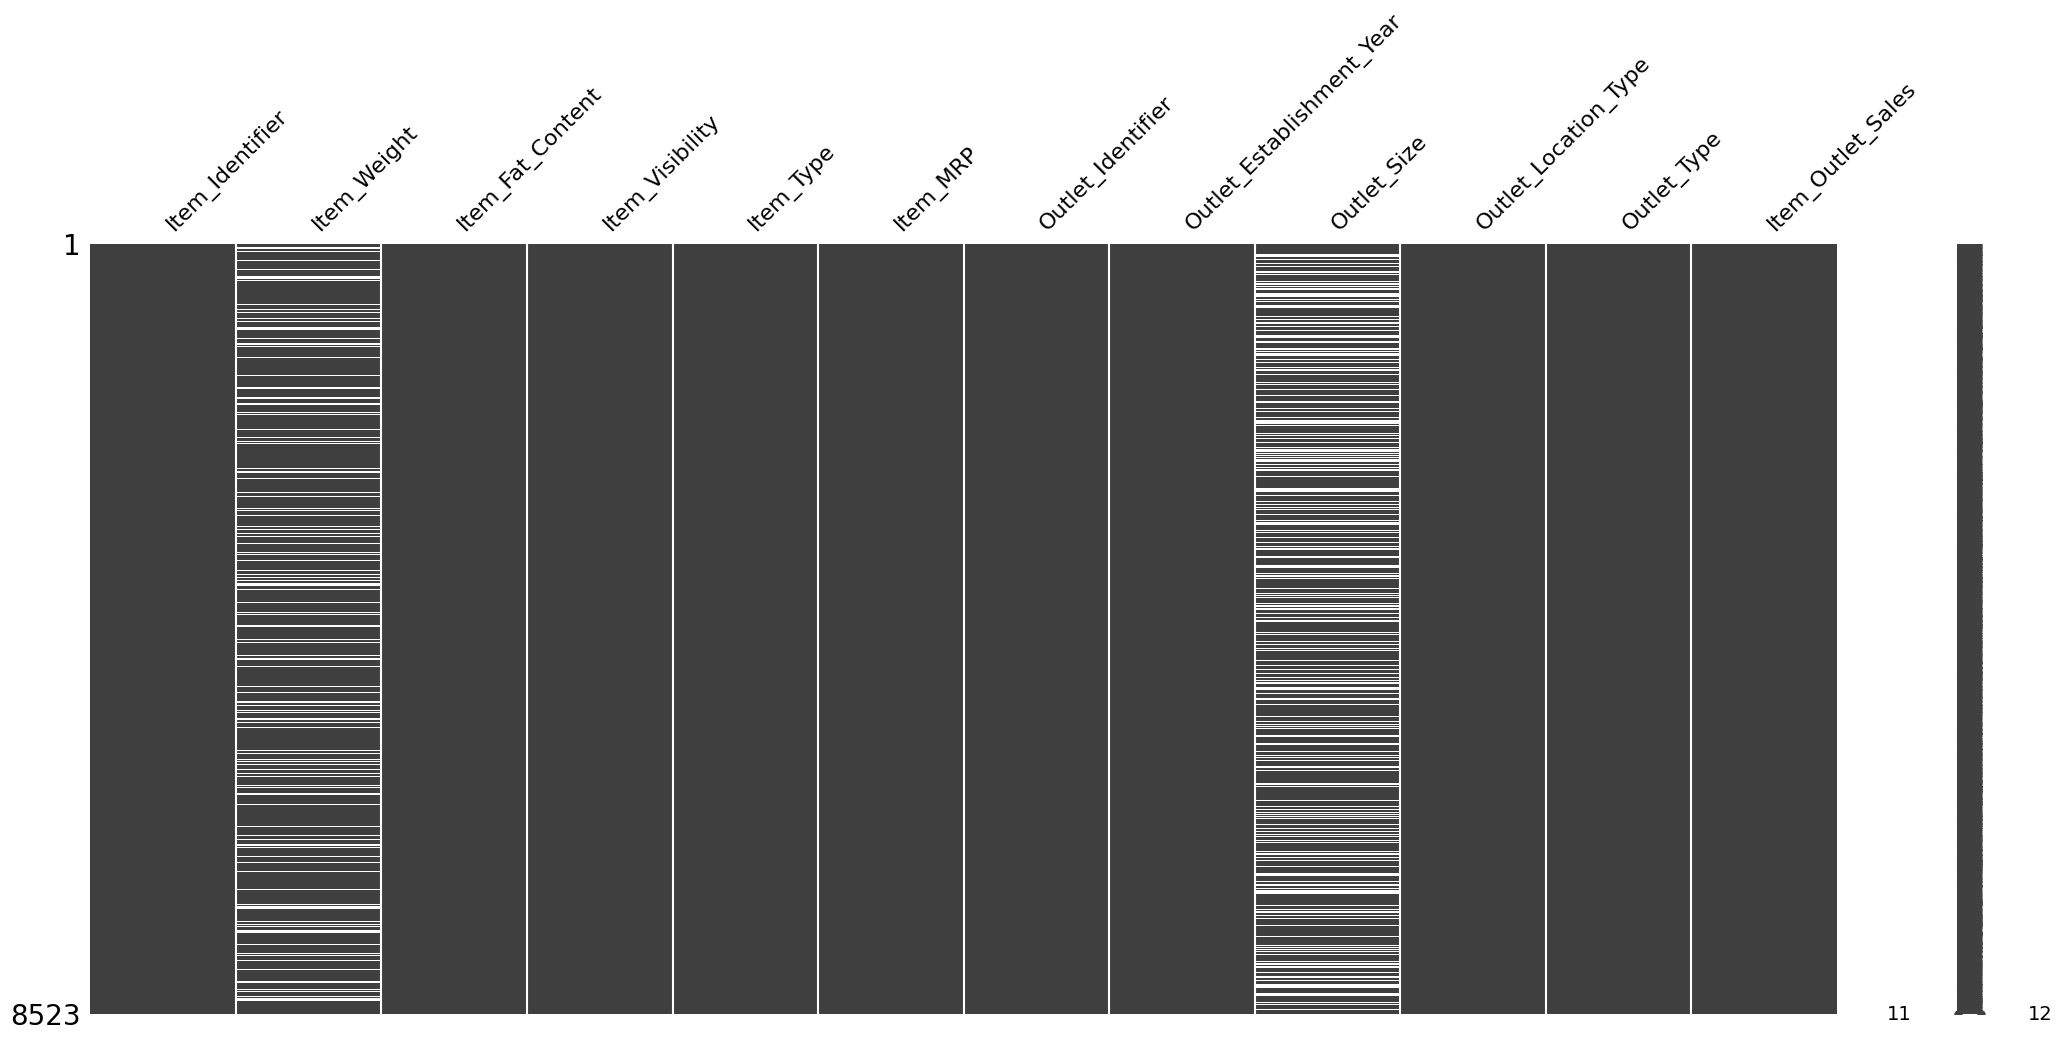

In [1112]:
# Checking nulls with missingo
import missingno as msno
msno.matrix(df)

 - In the missingno matrix plot, we can see that there are only a two columns that have missing values. ("Item weight" and "Outlet_size").

 - Below, we will display the null value counts and percentages for only the column with null values:

In [1113]:
# Display a data frame to show null values and there percentge
null_sums=df.isna().sum()
null_columns= null_sums[null_sums>0]
print(null_columns)
# Null values percentge
null_sums_percentage=null_sums/len(df)
null_sums_percentage[null_sums_percentage>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64


,0
Item_Weight,0.171653
Outlet_Size,0.282764


Null Value Observations:

 - Item_weight and Outlet_size have a moderate percentage of null values (17% and 28%, respectively).

1) Adressing Item_weight missing values


In [1114]:
# Check the nulls in item weight
null_item_weight = df['Item_Weight'].isna()
df[null_item_weight].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


  - There are 1463 missing values in item weight



In [1115]:
print(df.loc[df['Item_Identifier']=='FDP10', ['Item_Weight', 'Item_Identifier']])
# Checking NCZ45 in item_identifier
print(df.loc[df['Item_Identifier']=='DRK37', ['Item_Weight', 'Item_Identifier']])
# checking FDW13 in item_identifier
print(df.loc[df['Item_Identifier']=='FDU44', ['Item_Weight', 'Item_Identifier']])
#creating a defenition to check weight for each item identifier
def check_weight(identifier):
  return df.loc[df['Item_Identifier']==identifier, 'Item_Weight']

      Item_Weight Item_Identifier
7             NaN           FDP10
585          19.0           FDP10
2623         19.0           FDP10
3382         19.0           FDP10
4585         19.0           FDP10
6087         19.0           FDP10
7883         19.0           FDP10
      Item_Weight Item_Identifier
599           5.0           DRK37
1046          NaN           DRK37
3687          5.0           DRK37
7568          5.0           DRK37
8485          NaN           DRK37
      Item_Weight Item_Identifier
247         12.15           FDU44
765         12.15           FDU44
857           NaN           FDU44
2719        12.15           FDU44
5733        12.15           FDU44
8490          NaN           FDU44


In [1116]:
check_weight('DRG13')

,Item_Weight
3027,17.25
4292,17.25
5323,17.25
6428,17.25
8487,NaN


- After checking the relation between item identifier and item weight and taking 3 samples and trying the definition for several items, we can replace the null value in item weight by the weight that has the same Item identifier since the weight of each Item identifier is all the same as shown.

- Filling the null values with mapping both item dentifier and item weight

In [1117]:
# Checking the nunique for item identidier
df_un= df['Item_Identifier'].nunique()
df_un
# defining item_weight for each df_un
df_un_weight=df['Item_Weight'].nunique()
df_un_weight
# group by item_weight and find the most frequent item identifier
df_group_iden= df.groupby(['Item_Identifier'])['Item_Weight'].agg(lambda x: x.value_counts().index[0] if not x.value_counts().empty else None)
(df_group_iden.head(10))


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
DRB24,8.785
DRB25,12.300
DRB48,16.750
DRC01,5.920


- There are 1559 different identifiers for Item identifier

In [1118]:
# assigen item weight to item identifier (mapping)
df['Item_Weight']=df['Item_Identifier'].map(df_group_iden)

In [1119]:
# Checking nulls after mapping
check_weight('DRG13')

,Item_Weight
3027,17.25
4292,17.25
5323,17.25
6428,17.25
8487,17.25


In [1120]:
# Rechecking null values and general info
print(df.isna().sum())
print(df.info())

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier  

In [1121]:
null_item_weight = df['Item_Weight'].isna()
df[null_item_weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


- After mapping the null values in item weight,there are only four null items remaning, we will impute them with the mean

In [1122]:
rem_nul_indices = df.loc[df['Item_Weight'].isna()].index.tolist()
# Calculate the mean of the 'Item_Weight'
mean_item_weight = df['Item_Weight'].mean()
# Fill the missing 'Item_Weight' values for the specific rows (rem_nul_indices)
df.loc[rem_nul_indices, 'Item_Weight'] = df.loc[rem_nul_indices, 'Item_Weight'].fillna(mean_item_weight)
# confirming no nulls any more
print(df['Item_Weight'].isna().sum())

0


2) Adressing Outlet_Size missing values

In [1123]:
# Checking null values
df['Outlet_Size'].isna().sum()

np.int64(2410)

In [1124]:
# Checking the null values in outlet_size
null_outlet_size = df['Outlet_Size'].isna()
df[null_outlet_size]
# Optionally, reset the option to the default after printing
pd.reset_option('display.max_rows')

In [1125]:
print(df.loc[df['Outlet_Identifier']=='OUT010', ['Outlet_Size', 'Outlet_Identifier', 'Outlet_Establishment_Year']])
# Checking NCZ45 in item_identifier
print(df.loc[df['Outlet_Identifier']=='OUT017', ['Outlet_Size', 'Outlet_Identifier', 'Outlet_Establishment_Year']])
# checking FDW13 in item_identifier
print(df.loc[df['Outlet_Identifier']=='OUT045', ['Outlet_Size', 'Outlet_Identifier', 'Outlet_Establishment_Year']])
#creating a defenition to check weight for each item identifier
def check_size(identifier):
  return df.loc[df['Outlet_Identifier']==identifier, 'Outlet_Size']

     Outlet_Size Outlet_Identifier  Outlet_Establishment_Year
3            NaN            OUT010                       1998
28           NaN            OUT010                       1998
30           NaN            OUT010                       1998
45           NaN            OUT010                       1998
65           NaN            OUT010                       1998
...          ...               ...                        ...
8400         NaN            OUT010                       1998
8432         NaN            OUT010                       1998
8473         NaN            OUT010                       1998
8486         NaN            OUT010                       1998
8509         NaN            OUT010                       1998

[555 rows x 3 columns]
     Outlet_Size Outlet_Identifier  Outlet_Establishment_Year
9            NaN            OUT017                       2007
25           NaN            OUT017                       2007
53           NaN            OUT017            

In [1126]:
# Checking unique values for outlet identifier and outlet establishment year
print(df['Outlet_Identifier'].nunique())
print(df['Outlet_Establishment_Year'].nunique())
print(df['Outlet_Size'].nunique())
# Checking there value counts
print(df['Outlet_Identifier'].value_counts())
print(df['Outlet_Establishment_Year'].value_counts())
print(df['Outlet_Size'].value_counts())

10
9
3
Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64
Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64


- After checking the the null values, all the data of outlet size for the years 1998, 2002 and 2007 are missing

- Filling the null values with missing

In [1127]:
from logging import PlaceHolder
# filling the Nan with placeholder missing
PlaceHolder='missing'
df['Outlet_Size']=df['Outlet_Size'].fillna('missing')
# confirming no nulls any more
df['Outlet_Size'].isna().sum()


np.int64(0)

##### Finding and fixing any inconsistent features.


1- Categorical features

In [1128]:
# filtering the string columns
all_string_columns=df.select_dtypes(include='object').columns
cat_cols= all_string_columns.tolist()
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [1129]:
# making a for loop fpor the string columns
for col in cat_cols:
  print(f"{col}:")
  print(df[col].value_counts(dropna=False))
  print("\n")

Item_Identifier:
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier:
Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929


correcting Item_Fat_Contant

There were a small number of values in the Fat contant column that had "LF' and 'low fat' instead of "Low Fat" and "reg" instead of "regular."



In [1130]:
# fixing the inconsistancy in Item fat contant
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
# Checking item fat contant
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


2- Numeric features

In [1131]:
# filtering the numeric columns
all_num_cols=df.select_dtypes(include='number').columns
all_num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [1132]:
# Making a loop to describe all num cols
for col in all_num_cols:
  print(f"{col}:")
  print(df[col].describe())
  print("\n")


Item_Weight:
count    8523.000000
mean       12.875420
std         4.645008
min         4.555000
25%         8.785000
50%        12.650000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


Item_Visibility:
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Item_MRP:
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Outlet_Establishment_Year:
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


Item_Outlet_Sales:
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.29

- Notes on Numeric Feature Inconsistencies

  - item visability: has a minimum value of 0.
  - Also checking the minimum value of Item outlet sales its much lower than the 25% (33 to 834 $)

A) Ckecking item visibility 0.0000

In [1133]:
df[df['Item_Visibility']==0.0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,7.315,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,missing,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,missing,Tier 2,Supermarket Type1,1637.8680


- We have 526 rows with item visibilty spread over different item types

In [1134]:
# Ckecking a sample of item type Baking goods
df[df['Item_Type']=='Baking Goods']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
48,FDL12,15.850,Regular,0.121633,Baking Goods,60.6220,OUT046,1997,Small,Tier 1,Supermarket Type1,2576.6460
71,FDL12,15.850,Regular,0.121532,Baking Goods,59.2220,OUT013,1987,High,Tier 3,Supermarket Type1,599.2200
...,...,...,...,...,...,...,...,...,...,...,...,...
8435,FDT48,4.920,Low Fat,0.000000,Baking Goods,196.5084,OUT027,1985,Medium,Tier 3,Supermarket Type3,793.6336
8441,FDK60,16.500,Regular,0.094010,Baking Goods,95.2068,OUT049,1999,Medium,Tier 1,Supermarket Type1,777.6544
8465,FDX11,16.000,Regular,0.106969,Baking Goods,180.5634,OUT045,2002,missing,Tier 2,Supermarket Type1,2726.4510
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880


- We notice a similarity in item identifier FDL12 visibility


In [1135]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [1136]:
# Ckecking FDL12 similarity in visibility
print('FDL12', df.loc[df['Item_Identifier']=='FDL12', ['Item_Visibility']])
print('\n')
#Taking more samples
print('FDL13', df.loc[df['Item_Identifier']=='FDL13', ['Item_Visibility']])
print('\n')
print('FDL14', df.loc[df['Item_Identifier']=='FDL14', ['Item_Visibility']])
print('\n')
# Taking more samples
print('FDT48', df.loc[df['Item_Identifier']=='FDT48', ['Item_Visibility']])
print('\n')
print('FDS36', df.loc[df['Item_Identifier']=='FDS36', ['Item_Visibility']])
print('\n')

FDL12       Item_Visibility
48           0.121633
71           0.121532
1688         0.121044
3341         0.212963
6734         0.121610


FDL13       Item_Visibility
1088         0.098607
1573         0.056433
2843         0.056637
3328         0.056272
4225         0.094266
4841         0.056548
8222         0.056406


FDL14       Item_Visibility
1617         0.053827
2552         0.032153
4735         0.032159
6385         0.032209


FDT48       Item_Visibility
1242         0.046026
1494         0.046215
3805         0.045955
5595         0.046142
6252         0.045917
8435         0.000000


FDS36       Item_Visibility
4986         0.046878
5570         0.046848
5666         0.046887
6299         0.046960
8279         0.047153
8519         0.046982




- Its obvious that each item identifier has a very similar visibility.

In [1137]:
# Calculate the mean Item visibility for each Item_Identifier
mean_vis_by_item = df.groupby('Item_Identifier')['Item_Visibility'].mean()
# Display the result
print(mean_vis_by_item)
# checking a sample mean fo FDL12
print('\n')
print('FDL12_new_vis:', mean_vis_by_item['FDL12'])

Item_Identifier
DRA12    0.031956
DRA24    0.048062
DRA59    0.134718
DRB01    0.082126
DRB13    0.008002
           ...   
NCZ30    0.024956
NCZ41    0.051623
NCZ42    0.009044
NCZ53    0.027775
NCZ54    0.080426
Name: Item_Visibility, Length: 1559, dtype: float64


FDL12_new_vis: 0.1397561692


- Great we have a very close value for FDL12 (0.13) visibility instead of 0.000
- Replacing 0.000 for each item identifier to its mean

In [1138]:
# Calculate the median Item visibility for each Item_Identifier
median_vis_by_item = df.groupby('Item_Identifier')['Item_Visibility'].mean()

# Find the rows where Item_Visibility is 0.0
zero_visibility_rows = df[df['Item_Visibility'] == 0.0]

# Iterate through the rows with 0.0 visibility and replace with the median for that Item_Identifier
for index, row in zero_visibility_rows.iterrows():
    item_id = row['Item_Identifier']
    # Get the median visibility for the current item_id
    median_visibility = median_vis_by_item.get(item_id, 0)
    # Replace the 0.0 value in the original DataFrame with the median
    df.loc[index, 'Item_Visibility'] = median_visibility

# Verify the changes by checking if there are any 0.0 values left
print("Number of 0.0 Item_Visibility values after replacement:", (df['Item_Visibility'] == 0.0).sum())

print('\n')
# check the visibility for a sample item that previously had 0.0
print('FDT48', df.loc[df['Item_Identifier']=='FDT48', ['Item_Visibility']])

Number of 0.0 Item_Visibility values after replacement: 0


FDT48       Item_Visibility
1242         0.046026
1494         0.046215
3805         0.045955
5595         0.046142
6252         0.045917
8435         0.038376


B) Checking item visibilty outliers

In [1139]:
# Checking item visability outliers ascendeing = false
df.sort_values(by='Item_Visibility', ascending=False).head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
854,FDU13,8.355,Low Fat,0.328391,Canned,146.0418,OUT019,1985,Small,Tier 1,Grocery Store,588.5672
3750,NCZ18,7.825,Low Fat,0.325781,Household,252.7698,OUT019,1985,Small,Tier 1,Grocery Store,761.0094
1805,FDJ56,8.985,Low Fat,0.321115,Fruits and Vegetables,100.7700,OUT019,1985,Small,Tier 1,Grocery Store,199.7400
7250,FDT24,12.350,Regular,0.311090,Baking Goods,79.2328,OUT010,1998,missing,Tier 3,Grocery Store,154.4656
2855,NCE31,7.670,Low Fat,0.309390,Household,33.2216,OUT010,1998,missing,Tier 3,Grocery Store,138.4864
4382,FDG32,19.850,Low Fat,0.308145,Fruits and Vegetables,222.0772,OUT019,1985,Small,Tier 1,Grocery Store,889.5088
7603,DRF01,5.655,Low Fat,0.306543,Soft Drinks,147.3102,OUT019,1985,Small,Tier 1,Grocery Store,291.6204
6622,FDI32,17.700,Low Fat,0.305305,Fruits and Vegetables,116.6834,OUT019,1985,Small,Tier 1,Grocery Store,460.7336
3474,FDS12,9.100,Low Fat,0.304859,Baking Goods,125.4362,OUT019,1985,Small,Tier 1,Grocery Store,755.0172
5150,FDR14,11.650,Low Fat,0.304737,Dairy,54.7298,OUT019,1985,Small,Tier 1,Grocery Store,107.8596


- Most outliers are in Grocery stores (its normal because they have a small space) so visability will have higher percentge)

C) Checking the 33$ in Item outlet sales

In [1140]:
# Checking Item outlet sales
# list item outlet sales from lower values to higher values
df[df['Item_Outlet_Sales'] < 100]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
178,DRY23,9.395,Regular,0.191014,Soft Drinks,42.1112,OUT019,1985,Small,Tier 1,Grocery Store,42.6112
255,FDQ04,6.400,Low Fat,0.148393,Frozen Foods,41.5796,OUT019,1985,Small,Tier 1,Grocery Store,41.2796
405,FDW24,6.800,Low Fat,0.065652,Baking Goods,48.9034,OUT019,1985,Small,Tier 1,Grocery Store,48.6034
417,FDW35,10.600,Low Fat,0.019416,Breads,41.6454,OUT019,1985,Small,Tier 1,Grocery Store,83.8908
430,FDW23,5.765,Low Fat,0.143593,Baking Goods,37.3164,OUT019,1985,Small,Tier 1,Grocery Store,38.6164
...,...,...,...,...,...,...,...,...,...,...,...,...
8152,FDX23,6.445,Low Fat,0.049698,Baking Goods,95.0436,OUT010,1998,missing,Tier 3,Grocery Store,94.5436
8239,FDG40,13.650,Low Fat,0.066658,Frozen Foods,32.6558,OUT010,1998,missing,Tier 3,Grocery Store,67.9116
8241,DRH59,10.800,Low Fat,0.097806,Hard Drinks,73.9380,OUT010,1998,missing,Tier 3,Grocery Store,73.2380
8442,FDX40,12.850,Low Fat,0.173324,Frozen Foods,39.9164,OUT019,1985,Small,Tier 1,Grocery Store,38.6164


In [1141]:
# Checking item visability outliers ascendeing = false
df.sort_values(by='Item_Visibility', ascending=False).head(100)
# Checking FDU13 in item identifier
#print(df.loc[df['Item_Identifier']=='FDU13', ['Item_Visibility', 'Item_Identifier', 'Outlet_Type']])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
854,FDU13,8.355,Low Fat,0.328391,Canned,146.0418,OUT019,1985,Small,Tier 1,Grocery Store,588.5672
3750,NCZ18,7.825,Low Fat,0.325781,Household,252.7698,OUT019,1985,Small,Tier 1,Grocery Store,761.0094
1805,FDJ56,8.985,Low Fat,0.321115,Fruits and Vegetables,100.7700,OUT019,1985,Small,Tier 1,Grocery Store,199.7400
7250,FDT24,12.350,Regular,0.311090,Baking Goods,79.2328,OUT010,1998,missing,Tier 3,Grocery Store,154.4656
2855,NCE31,7.670,Low Fat,0.309390,Household,33.2216,OUT010,1998,missing,Tier 3,Grocery Store,138.4864
...,...,...,...,...,...,...,...,...,...,...,...,...
847,FDL56,14.100,Low Fat,0.220226,Fruits and Vegetables,85.6198,OUT019,1985,Small,Tier 1,Grocery Store,87.2198
4987,FDR48,11.650,Low Fat,0.220111,Baking Goods,153.0024,OUT010,1998,missing,Tier 3,Grocery Store,455.4072
4538,FDS13,6.465,Low Fat,0.217994,Canned,266.5884,OUT019,1985,Small,Tier 1,Grocery Store,1324.9420
5050,NCA30,19.000,Low Fat,0.216478,Household,190.1872,OUT010,1998,missing,Tier 3,Grocery Store,567.2616


# Phase 3) Data Understanding

## 3.1) What data have we been provided?

- The stakeholders have provided us with two links:

 Share URL to a .csv file

 - A spreadsheet of various features of products, various stores types, as well as the sales of products in each particular store.

- A Data Dictionary File
 - A data dictionary is a document that lists the name and explanation for every feature in a dataset.

## 3.2) What information is included in the data?

The file had 8523 rows and 12 columns.

- There is a mixture of datatypes:

 - 4 float
 - 1 int
 - 7 object

- Since numeric features are sometimes stored as object dtype, we will inspect the object columns next and look for columns that should be converted.

- NO object columns that needed to be converted to numeric:

What is the meaning of each feature?

  - Please see the (Data Dictionary) File for full details.

Data Dictionary:

  - Please see the feature inspection section below for the definitions of the features that were included in the model.

  After consulting the data dictionary, we noticed there are no features  not included in the data dictionary:

  - There is no erroneous index column that is not in the data dictionary, and nothing should be dropped.

  - There is no  column that is not included in the data dictionary.

   - If existed it may be a unique identifier, and can be either dropped or used as the index after checking for duplicates.

  - There were no features with ambiguous column names. No featurs were renamed for clarity.

Are there duplicate rows?

  - There were No duplicate rows.

Are there missing values?

  - In the missingno matrix plot, we can see that there are only a two columns that have missing values. ("Item weight" and "Outlet_size").

   - Image

 - Below, we will display the null value counts and percentages for only the column with null values
   - Table

Null Value Observations:

  - Item_weight and Outlet_size have a moderate percentage of null values (17% and 28%, respectively).

Are there any features with inconsistent values?

1) Categorical Features

Item_Fat_Contant

There were a small number of values in the Fat contant column that had "LF, low fat" instead of "Low Fat" and "reg" instead of "regular."


2) Numerical Features

- Table-

Notes on Numeric Feature Inconsistencies

  - Item visibility: has a minimum value of 0.
  - Item visibility outliers
  - Also checking the minimum value of Item outlet sales its much lower than the 25% ( 33 - 843$ )

After inspecting we decided:

- The 0.0 values in item visibility needs to be changed by the mean of each item identifier.
- Item Visibility outliers are mostly in Grocery Stores (Small space increases visibility percentge)
- After checking the 33 dollars item outlet sales we found it normal because it represents the sales in grocery stores.




# Phase 4) Visualizing the data set

#### Numeric columns

In [1142]:

"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Categorial
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

# Numeric
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

  # explore_categorical(df,feature);

  # explore_numeric(df,feature);

In [1143]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

  # plot_categorical_vs_target(df, feature, 'rating');

  # plot_numeric_vs_target(df,feature, 'rating');

In [1144]:
# replace missing in Outlet Size with np.nan
placeholder= 'missing'
df['Outlet_Size'].replace(placeholder, np.nan, inplace=True)

/tmp/ipython-input-1144-2028274938.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Outlet_Size'].replace(placeholder, np.nan, inplace=True)


Item Weight
 - Weight of products

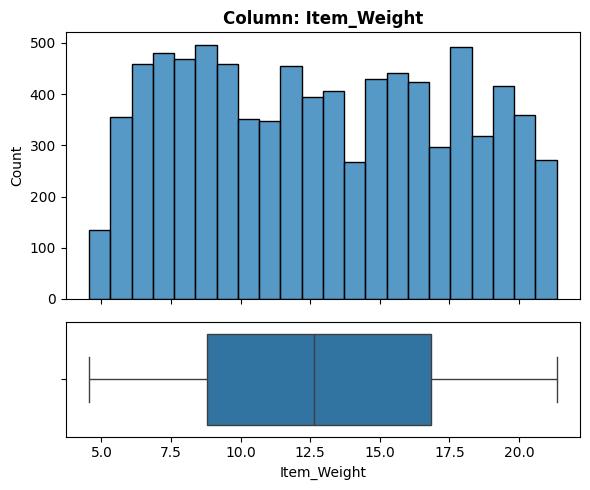

- NaN's Found: 0 (0.0%)
- Unique Values: 416
- Most common value: '12.15' occurs 105 times (1.23%)
- Not constant or quasi-constant.


In [1145]:
feature= 'Item_Weight'
explore_numeric(df,feature);

1. What type of feature is it?

- Numerical

2. How many null values? What percentage?

- No

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- Not aplicable in numeric columns

5. Is there a business case/understanding reason to exclude based on our business case?

- No

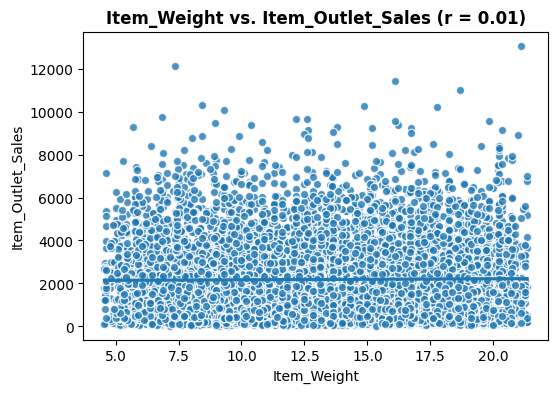

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [1146]:
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales')

Feature vs. Target Observations:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes.
- Does this feature appear to be a predictor of the target?
 - Not really. The trendline is flat and the correlation is low.

Item_Visibility
 - percentage the shows item visability

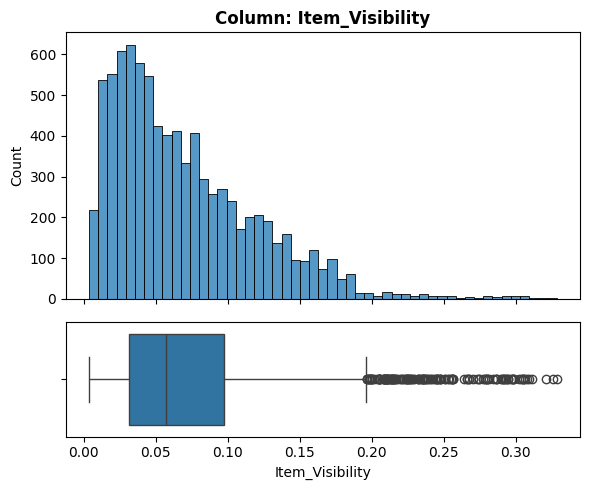

- NaN's Found: 0 (0.0%)
- Unique Values: 8325
- Most common value: '0.052234102857142854' occurs 4 times (0.05%)
- Not constant or quasi-constant.


In [1147]:
feature= 'Item_Visibility'
explore_numeric(df,feature);

1. What type of feature is it?

- Numerical

2. How many null values? What percentage?

- No

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- Not aplicable in numeric columns

5. Is there a business case/understanding reason to exclude based on our business case?

- No

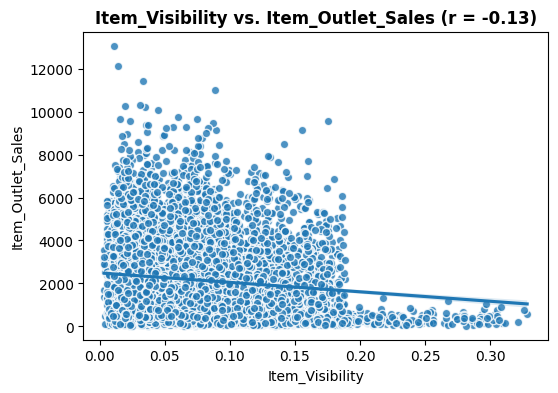

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [1148]:
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales')

Feature vs. Target Observations:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes.
- Does this feature appear to be a predictor of the target?
 - Not really. The trendline is somewhat flat and the correlation is low.

Item_MRP
 - Item Maximum price (price list)

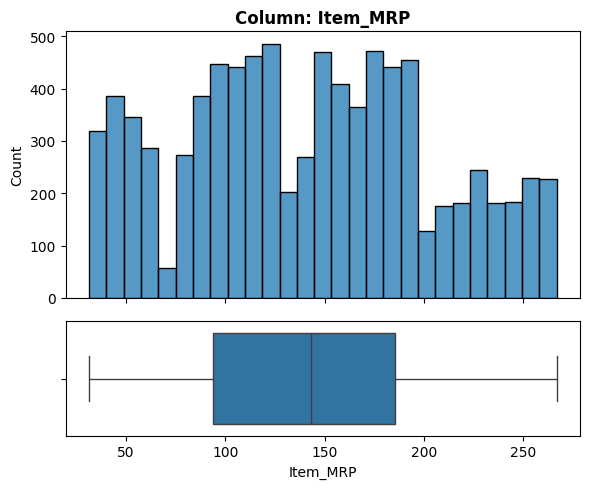

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [1149]:
feature= 'Item_MRP'
explore_numeric(df,feature);

1. What type of feature is it?

- Numerical

2. How many null values? What percentage?

- No

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- Not aplicable in numeric columns

5. Is there a business case/understanding reason to exclude based on our business case?

- No

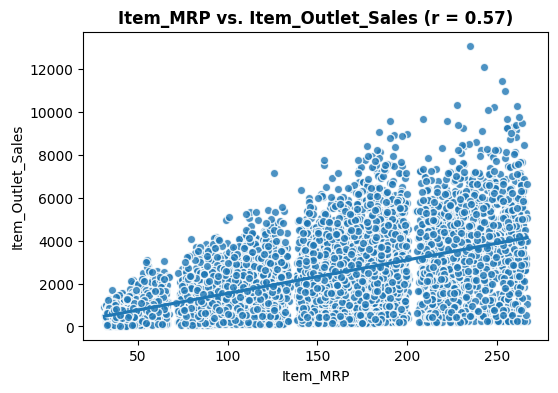

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [1150]:
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales')

Feature vs. Target Observations:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes.
- Does this feature appear to be a predictor of the target?
 - Yes. there is a moderate positive correlation.

Outlet_Establishment_Year
 - The year the outlit was established

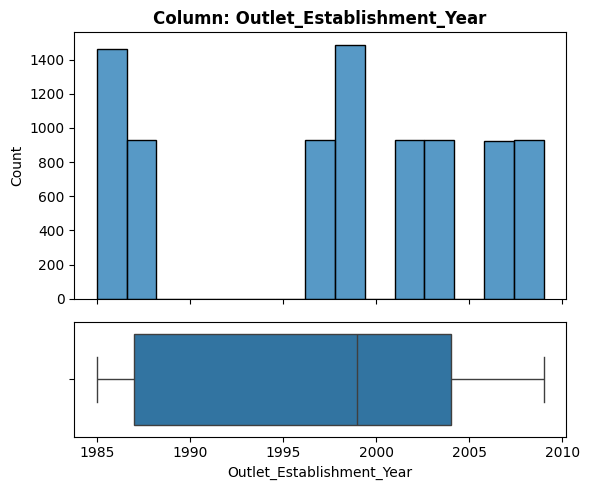

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [1151]:
feature= 'Outlet_Establishment_Year'
explore_numeric(df,feature);

1. What type of feature is it?

- Numerical

2. How many null values? What percentage?

- No

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- Not aplicable in numeric columns

5. Is there a business case/understanding reason to exclude based on our business case?

- No

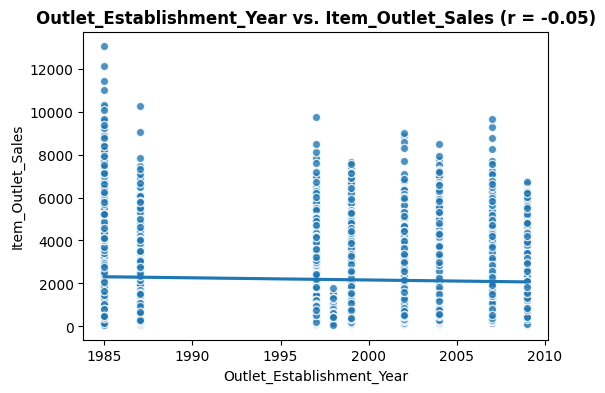

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Establishment_Year vs. Item_Outlet_Sales (r = -0.05)'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>)

In [1152]:
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales')

Feature vs. Target Observations:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes.
- Does this feature appear to be a predictor of the target?
 - Not really. The trendline is somewhat flat and the correlation is low.

#### Categorial columns

'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [1153]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Item_Fat_Content

 - Items contain Low Fat or regular

/tmp/ipython-input-1142-2158395038.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


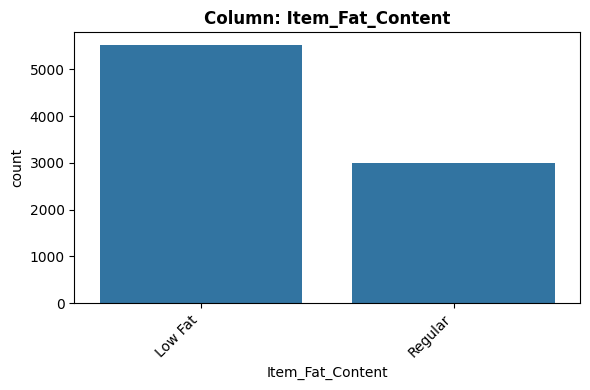

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [1154]:
feature= 'Item_Fat_Content'
explore_categorical(df,feature);

1. What type of feature is it?

- Categorial

2. How many null values? What percentage?

- No

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- Too low only 2 features

5. Is there a business case/understanding reason to exclude based on our business case?

- No

/tmp/ipython-input-1143-321421029.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


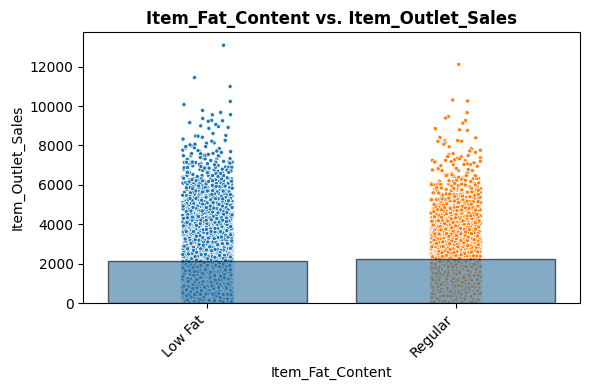

In [1155]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes.
- Does this feature appear to be a predictor of the target?
 - No

Item_Type
- Type of items (Fruits , vegtables , bakery, drinks..ect)

/tmp/ipython-input-1142-2158395038.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


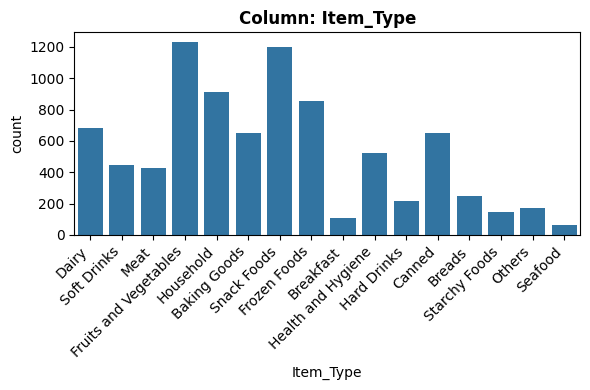

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [1156]:
feature= 'Item_Type'
explore_categorical(df,feature);

1. What type of feature is it?

- Categorial

2. How many null values? What percentage?

- No

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- Yes 16 features

5. Is there a business case/understanding reason to exclude based on our business case?

- No

/tmp/ipython-input-1143-321421029.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


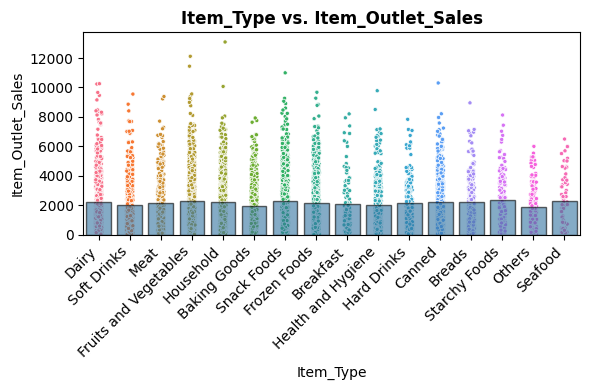

In [1157]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes.
- Does this feature appear to be a predictor of the target?
 - Yes

Outlet_Identifier:
- Store ID

/tmp/ipython-input-1142-2158395038.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


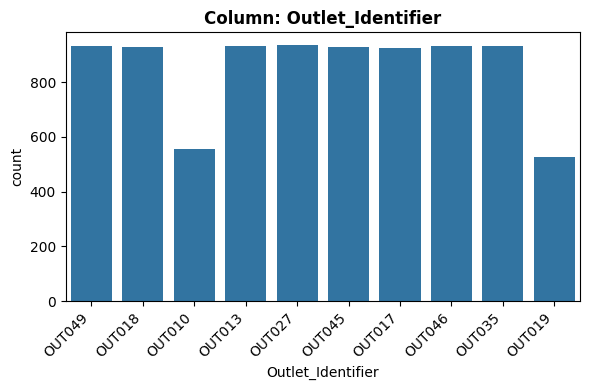

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [1158]:
feature= 'Outlet_Identifier'
explore_categorical(df,feature);

1. What type of feature is it?

- Categorial

2. How many null values? What percentage?

- No

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- No = 10

5. Is there a business case/understanding reason to exclude based on our business case?

- No

/tmp/ipython-input-1143-321421029.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


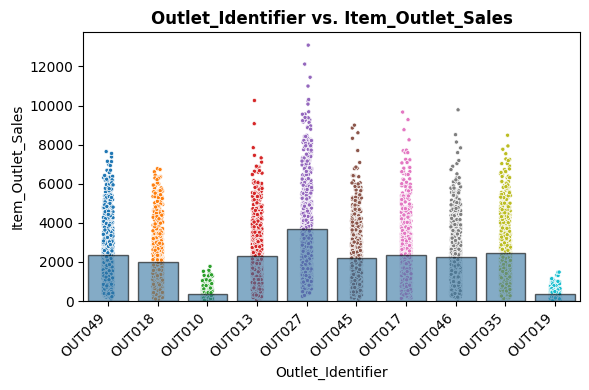

In [1159]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes.
- Does this feature appear to be a predictor of the target?
 - Yes

Outlet_Size

/tmp/ipython-input-1142-2158395038.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


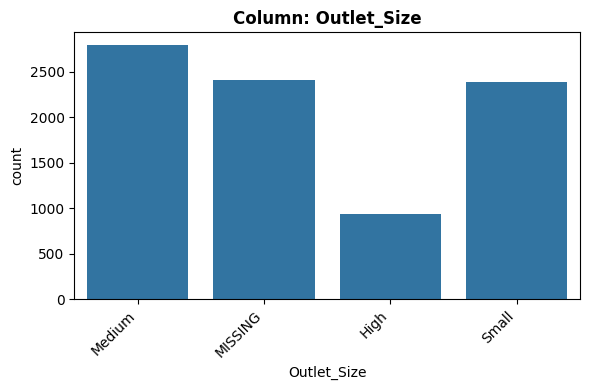

/tmp/ipython-input-1142-2158395038.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


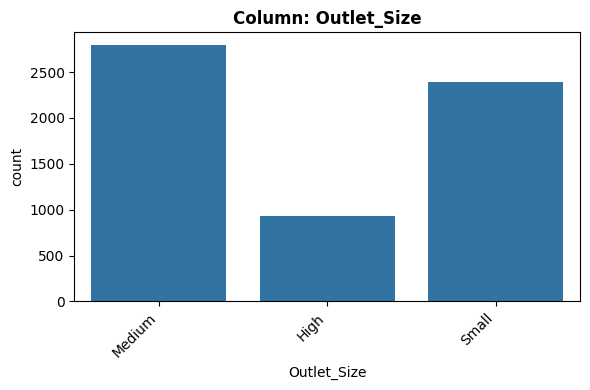

- NaN's Found: 2410 (28.28%)
- Unique Values: 3
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [1160]:
feature= 'Outlet_Size'
explore_categorical(df,feature);
explore_categorical(df,feature, fillna= False);

1. What type of feature is it?

- Categorial

2. How many null values? What percentage?

- 2410

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- No

5. Is there a business case/understanding reason to exclude based on our business case?

- No

/tmp/ipython-input-1143-321421029.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-1143-321421029.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


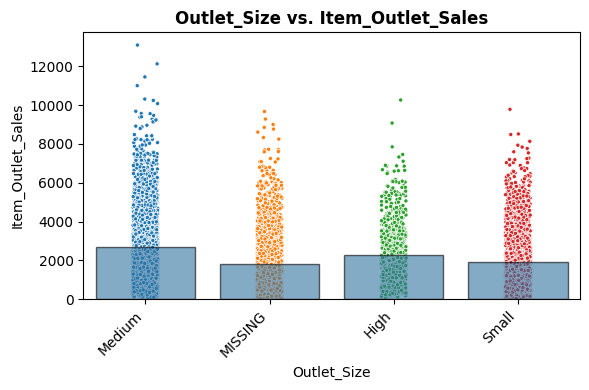

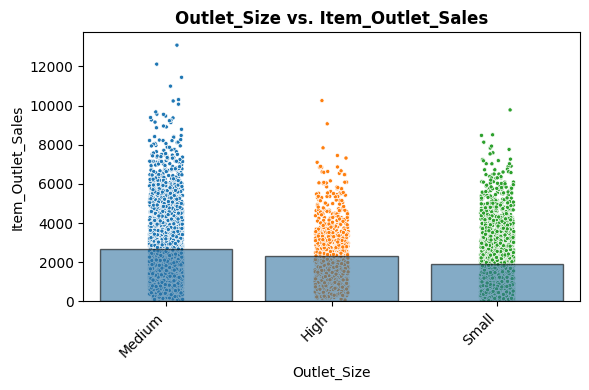

In [1161]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales', fillna= False);

Feature vs. Target Observations:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes.
- Does this feature appear to be a predictor of the target?
 - Maybe

Outlet_Location_Type:
- The type of area in which the store is located

/tmp/ipython-input-1142-2158395038.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


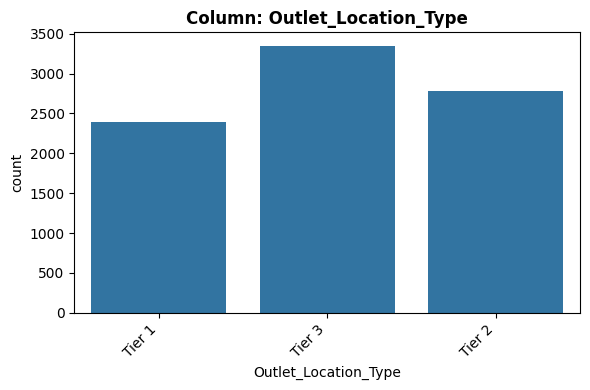

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [1162]:
feature= 'Outlet_Location_Type'
explore_categorical(df,feature);

1. What type of feature is it?

- Categorial

2. How many null values? What percentage?

- No

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- No

5. Is there a business case/understanding reason to exclude based on our business case?

- No

/tmp/ipython-input-1143-321421029.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


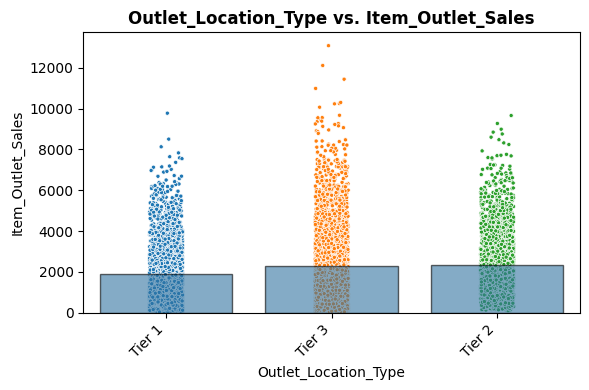

In [1163]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes.
- Does this feature appear to be a predictor of the target?
 - Maybe

Outlet_Type:
- Whether the outlet is a grocery store or some sort of supermarket

/tmp/ipython-input-1142-2158395038.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


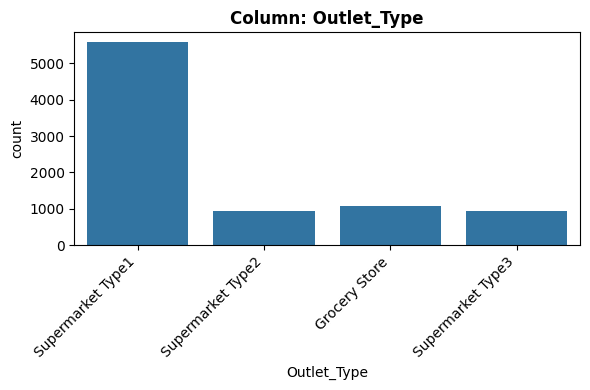

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [1164]:
feature= 'Outlet_Type'
explore_categorical(df,feature);

1. What type of feature is it?

- Categorial

2. How many null values? What percentage?

- No

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- No

5. Is there a business case/understanding reason to exclude based on our business case?

- No

/tmp/ipython-input-1143-321421029.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


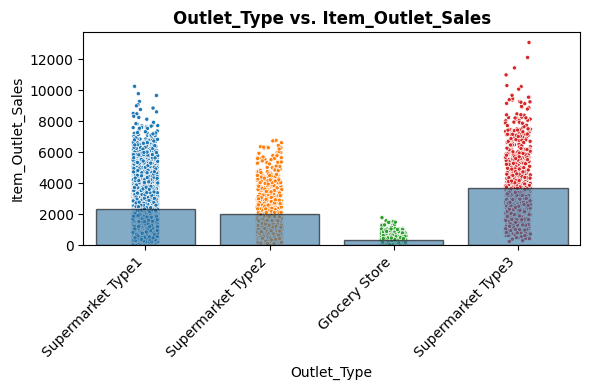

In [1165]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes
- Does this feature appear to be a predictor of the target?
 - Yes

In [1166]:
# Save file to google drive as Cvs
# Save the folder + filename as a variable called fpath
fpath ='/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/02-IntroML/Week07/Data/cleaned-data-project-1.csv'
# Use to_csv to save the dataframe using the filename
df.to_csv(fpath)

In [1167]:
# Read in your new .csv file with Pandas.
loaded= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/02-IntroML/Week07/Data/cleaned-data-project-1.csv')
# Display the info summary.
display(loaded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                6113 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

None

# Phase 5) Data Preparation for modeling

In [1168]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor # NEW
from sklearn.ensemble import RandomForestRegressor # NEW
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [1169]:
# Loading the cleaned data set
fpath= '/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/02-IntroML/Week07/Data/cleaned-data-project-1.csv'
df1=pd.read_csv(fpath)
df1.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                6113 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [1171]:
# drop column unamed 0
df1.drop(columns=['Unnamed: 0'], inplace=True)

Defining X an y Preparing for modeling

In [1172]:
###Make a list of features to drop
drop_from_model = ['Item_Identifier', 'Outlet_Establishment_Year']
###Define features matrix
X = df1.drop(columns = [*drop_from_model,'Item_Outlet_Sales'])
###Define target
y = df1['Item_Outlet_Sales']
#Checking X
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.008082,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1


In [1173]:
###runing the X_train, X_test to 80% 20%
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)
###Display X_train, Y_train
display(X_train.head(3), y_train.head(3))

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.35,Low Fat,0.029565,Household,256.4646,OUT018,Medium,Tier 3,Supermarket Type2
7510,15.25,Regular,0.047083,Snack Foods,179.7660,OUT018,Medium,Tier 3,Supermarket Type2
5828,12.35,Regular,0.158716,Meat,157.2946,OUT049,Medium,Tier 1,Supermarket Type1


,Item_Outlet_Sales
4776,515.3292
7510,3056.0220
5828,1577.9460


In [1174]:
# Getting the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6392, 9), (2131, 9), (6392,), (2131,))

In [1175]:
# Target describe
y_train.describe()

,Item_Outlet_Sales
count,6392.000000
mean,2209.979357
std,1720.441446
min,33.290000
25%,856.884600
50%,1808.978600
75%,3136.250900
max,13086.964800


Ordinal Features

In [1176]:
### Checking which columns are ordinal
### creating a fillter for categorical columns
cat_cols_train= df1.dtypes[df1.dtypes == 'object'].index
cat_cols_train
### Checking which columns are ordinal
for col in cat_cols_train:
  print(col)
  print(df1[col].value_counts(dropna=False))
  print('\n')

Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Fat_Content
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    

In [1177]:
### define a list of columns to encode as ordinal
ord_cols = ['Outlet_Size']
ord_cols
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
### Making the OrdinalEncoder
### Specifying order of categories for our outlet size Columms
Outlet_Size_order = ['NA','Small','Medium', 'High']
### Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [Outlet_Size_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
### Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
###Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe
### Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', 'Small', 'Medium',
                                              'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

Categorical Features

In [1178]:
###Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
### Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(ohe_encoder)
ohe_pipe
### Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

OneHotEncoder Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

Numerical Features

In [1179]:
#PREPROCESSING PIPELINE FOR NUMERIC DATA
#Save list of column names
num_cols_train = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols_train)

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')


In [1180]:
#instantiate preprocessors
scaler = StandardScaler()
#Make a numeric preprocessing pipeline
num_pipe = make_pipeline(scaler)
num_pipe
#Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols_train)
num_tuple

('numeric',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object'))

In [1181]:
### Instantiate with verbose_feature_names_out=False
preprocessor = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple], verbose_feature_names_out=False)

In [1182]:
### Fit on training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [1183]:
### Transform the training data
X_train_tf = preprocessor.transform(X_train)
### Transform the testing data
X_test_tf = preprocessor.transform(X_test)
### View the processed training data
X_train_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.736478,-0.811167,1.828109,0.748125,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.499113,-0.455959,0.603369,0.748125,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.126668,1.807562,0.244541,0.748125,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.070734,-1.114037,-0.952591,-0.264370,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.383837,-1.073143,-0.336460,-1.276865,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Preprocessing (By Feature Type)

Numeric Features

- The following features were processed as numeric features:

  - 'Item_Weight', 'Item_Visibility', 'Item_MRP'

  - The data was sacled using StandardScaler.

Ordinal Features

- The following features were processed as ordinal features:
 - 'Outlet_Size' missing values were imputed with NA
 - Were encoded using OrdinalEncoder.
 - The ordinally-encoded features were then scaled using StandardScaler

Categorical (Nominal) Features

- The following features were processed as categorical features:
 - 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'
 - The features were then encoded with OneHotEncoder.

# Modeling

In [1184]:
# import regression metrics needed from sklearn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Define the custom functions for regressoin evaluation
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
   mae = mean_absolute_error(y_true, y_pred)
   mse = mean_squared_error(y_true, y_pred)
   # Calculate RMSE by taking the square root of MSE
   rmse = np.sqrt(mse)
   r_squared = r2_score(y_true, y_pred)
   if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
   if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df1 = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df1 = results_df1.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df1.index.name=None
    # Return the dataframe
    return results_df1.round(3)

###Call custom function to obtain evaluation metrics
##reg=liniar_reg
#evaluate_regression (reg, X_train, y_train, X_test, y_test)

####for pipeline
###Obtain Model Evulation using custom function
##reg=linreg_pipe
#evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

*1) linear regression model to predict sales.*

In [1185]:
linreg = LinearRegression()
### Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(preprocessor, linreg)
### Fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['NA',
                                                                                               '...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [1186]:
# describe the target
(df1['Item_Outlet_Sales'].describe().round(3))

,Item_Outlet_Sales
count,8523.000
mean,2181.289
std,1706.500
min,33.290
25%,834.247
50%,1794.331
75%,3101.296
max,13086.965


In [1187]:
##Call custom function to obtain evaluation metrics
reg= linreg_pipe
evaluate_regression (linreg_pipe, X_train, y_train, X_test, y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.263
- MSE = 1,297,884.862
- RMSE = 1,139.247
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 803.623
- MSE = 1,193,856.467
- RMSE = 1,092.637
- R^2 = 0.567


*The model is definatley underfit both the train and test data don't perfrom good.*

*2) Random forest model to predict sales.*

In [1188]:
###Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
###Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)
###Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['NA',
                                                                                               '...
                                                                   StandardScaler())]),
                                                  ['Outlet_Size']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [1189]:
##Call custom function to obtain evaluation metrics
reg= rf_pipe
evaluate_regression (rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 297.588
- MSE = 184,080.594
- RMSE = 429.046
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 763.122
- MSE = 1,211,196.070
- RMSE = 1,100.544
- R^2 = 0.561


*The model is overfit because the Training Data performs well but the Test Data doesn't*

*comparing R2 for both models the linear regression model performs slightly better*

In [1190]:
# Access the RandomForestRegressor step within the pipeline
random_forest_model = rf_pipe.steps[1][1]
# Iterate through the individual trees (estimators) in the forest
tree_depths = [tree.get_depth() for tree in random_forest_model.estimators_]
# You can then inspect the list of depths, e.g., get the maximum depth
max_depth = max(tree_depths)
print(f"Maximum depth of trees in the Random Forest: {max_depth}")

Maximum depth of trees in the Random Forest: 43


In [1191]:
# For reproducible results, set the random state
rf = RandomForestRegressor(random_state=42)

In [1192]:
# Spliting the X_train_tf to new train and validation
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train_tf, y_train, random_state=42)

In [1193]:
# Getting the sahpe
X_train_train.shape, X_val.shape, y_train_train.shape, y_val.shape

((4794, 39), (1598, 39), (4794,), (1598,))

In [1194]:
X_train_train.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1686,-0.676924,-1.128400,-1.548509,-1.276865,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6096,-1.225021,-1.116536,-0.376298,-1.276865,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
898,0.466745,0.548960,-0.159462,-1.276865,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1211,-0.633766,0.400724,0.057961,-1.276865,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7082,0.035172,-0.644321,0.508189,-1.276865,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3676,0.186222,1.471709,1.941864,-1.276865,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2239,-0.180615,-0.680431,0.097294,-0.264370,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2141,-0.169826,1.254583,0.753809,0.748125,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3599,-1.508781,0.389715,-0.207830,-1.276865,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2875,-0.483795,1.534603,0.238195,-1.276865,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [1195]:
# For reproducible results, set the random state
rf = RandomForestRegressor(random_state=42)

In [1196]:
# Fit the model on the training data only
rf.fit(X_train_train, y_train_train)

RandomForestRegressor(random_state=42)

In [1197]:
# Looking at options for tuning this model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [1198]:
# What was the depth of our default tree?
# Access the individual trees (estimators) within the fitted RandomForestRegressor
tree_depths = [tree.get_depth() for tree in rf.estimators_]
# Find the maximum depth among all trees
max_depth = max(tree_depths)
# Print the maximum depth
print(f"Maximum depth of trees in the Random Forest: {max_depth}")

Maximum depth of trees in the Random Forest: 41


In [1199]:
# List of values to try for max_depth:
depths = list(range(2, 11)) # will try every value between 2 and 43
# list to collect the results of each depth
scores_list = []
# Loop through depths
for depth in depths:
    rf = RandomForestRegressor(max_depth=depth, random_state=42)
    rf.fit(X_train_train, y_train_train)
    # Get predictions
    train_preds = rf.predict(X_train_train)
    test_preds = rf.predict(X_val)
    # Calculate score
    train_r2 = r2_score(y_train_train, train_preds)
    val_r2 = r2_score(y_val, test_preds)
    # Add dictionray of scores to score_list
    results = {'max_depth':depth,
               'Train R2':train_r2,
               'Test R2':val_r2}
    scores_list.append(results)
    # Print the results
    print(f'When max_depth is {depth},')
    print(f'- the training R2 is {train_r2:.3f}.')
    print(f'-        the Val R2 is {val_r2:.3f}.')
    print()

When max_depth is 2,
- the training R2 is 0.459.
- the Val R2 is 0.486.

When max_depth is 3,
- the training R2 is 0.544.
- the Val R2 is 0.553.

When max_depth is 4,
- the training R2 is 0.592.
- the Val R2 is 0.603.

When max_depth is 5,
- the training R2 is 0.607.
- the Val R2 is 0.609.

When max_depth is 6,
- the training R2 is 0.624.
- the Val R2 is 0.609.

When max_depth is 7,
- the training R2 is 0.645.
- the Val R2 is 0.607.

When max_depth is 8,
- the training R2 is 0.672.
- the Val R2 is 0.605.

When max_depth is 9,
- the training R2 is 0.702.
- the Val R2 is 0.603.

When max_depth is 10,
- the training R2 is 0.733.
- the Val R2 is 0.599.



- The best max depth is 5

In [1200]:
# List of values to try for max_depth:
n_estimators = list(range(50, 251, 50)) # will try every value between 2 and 43
# list to collect the results of each depth
scores_list = []
# Loop through depths
#Loop through n_estimators values
# Using the best max_depth found in the previous tuning step (which was 10 based on the notebook's previous output)
best_max_depth = 10

for n_est in n_estimators:
    # Instantiate RandomForestRegressor with the current n_estimators value and the best max_depth
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=best_max_depth, random_state=42)
    rf.fit(X_train_train, y_train_train)
    # Get predictions
    train_preds = rf.predict(X_train_train)
    test_preds = rf.predict(X_val)
    # Calculate score
    train_r2 = r2_score(y_train_train, train_preds)
    val_r2 = r2_score(y_val, test_preds)
    # Add dictionray of scores to score_list
    results = {'n_estimators':n_est,
               'Train R2':train_r2,
               'Test R2':val_r2}
    scores_list.append(results)
    # Print the results
    print(f'When n_estimators is {n_est} (with max_depth={best_max_depth}),')
    print(f'- the training R2 is {train_r2:.3f}.')
    print(f'-      the Val R2 is {val_r2:.3f}.')
    print()

When n_estimators is 50 (with max_depth=10),
- the training R2 is 0.734.
- the Val R2 is 0.598.

When n_estimators is 100 (with max_depth=10),
- the training R2 is 0.733.
- the Val R2 is 0.599.

When n_estimators is 150 (with max_depth=10),
- the training R2 is 0.734.
- the Val R2 is 0.599.

When n_estimators is 200 (with max_depth=10),
- the training R2 is 0.734.
- the Val R2 is 0.600.

When n_estimators is 250 (with max_depth=10),
- the training R2 is 0.734.
- the Val R2 is 0.599.



- The best n_estimators is 200

In [1240]:
# List of values to try for min_samples_leaf:
min_samples_leaf_values = list(range(55, 65)) # will try every value between 1 and 10
# list to collect the results of each depth
scores_list = []
# Loop through min_samples_split_values
for min_leaf in min_samples_leaf_values:
    # Instantiate RandomForestRegressor with the current min_samples_leaf value
    # Pass the current value from the loop (min_leaf) to the parameter
    rf = RandomForestRegressor(min_samples_leaf=min_leaf, random_state=42)
    rf.fit(X_train_train, y_train_train)
    # Get predictions
    train_preds = rf.predict(X_train_train)
    test_preds = rf.predict(X_val)
    # Calculate score
    train_r2 = r2_score(y_train_train, train_preds)
    val_r2 = r2_score(y_val, test_preds)
    # Add dictionary of scores to score_list
    results = {'min_samples_leaf':min_leaf, # Changed key name for clarity
               'Train R2':train_r2,
               'Test R2':val_r2}
    scores_list.append(results)
    # Print the results
    print(f'When min_samples_leaf is {min_leaf},') # Changed print statement for clarity
    print(f'- the training R2 is {train_r2:.3f}.')
    print(f'-      the Val R2 is {val_r2:.3f}.')
    print()

When min_samples_leaf is 55,
- the training R2 is 0.613.
-        the Val R2 is 0.610.

When min_samples_leaf is 56,
- the training R2 is 0.613.
-        the Val R2 is 0.610.

When min_samples_leaf is 57,
- the training R2 is 0.612.
-        the Val R2 is 0.610.

When min_samples_leaf is 58,
- the training R2 is 0.612.
-        the Val R2 is 0.609.

When min_samples_leaf is 59,
- the training R2 is 0.611.
-        the Val R2 is 0.609.

When min_samples_leaf is 60,
- the training R2 is 0.611.
-        the Val R2 is 0.610.

When min_samples_leaf is 61,
- the training R2 is 0.610.
-        the Val R2 is 0.609.

When min_samples_leaf is 62,
- the training R2 is 0.610.
-        the Val R2 is 0.609.

When min_samples_leaf is 63,
- the training R2 is 0.609.
-        the Val R2 is 0.609.

When min_samples_leaf is 64,
- the training R2 is 0.609.
-        the Val R2 is 0.609.



- The best min sample leaf is 25

In [1239]:
# List of values to try for min_samples_split:
min_samples_split_values = list(range(150, 161)) # will try every value between 2 and 6
# list to collect the results of each depth
scores_list = []
# Loop through min_samples_split_values
for min_split in min_samples_split_values:
    # Instantiate RandomForestRegressor with the current min_samples_split value
    rf = RandomForestRegressor(min_samples_split=min_split, random_state=42)
    rf.fit(X_train_train, y_train_train)
    # Get predictions
    train_preds = rf.predict(X_train_train)
    test_preds = rf.predict(X_val)
    # Calculate score
    train_r2 = r2_score(y_train_train, train_preds)
    val_r2 = r2_score(y_val, test_preds)
    # Add dictionary of scores to score_list
    results = {'min_samples_split':min_split,
               'Train R2':train_r2,
               'Test R2':val_r2}
    scores_list.append(results)
    # Print the results
    print(f'When min_samples_split is {min_split},')
    print(f'- the training R2 is {train_r2:.3f}.')
    print(f'-        the Val R2 is {val_r2:.3f}.')
    print()

When min_samples_split is 150,
- the training R2 is 0.629.
-        the Val R2 is 0.610.

When min_samples_split is 151,
- the training R2 is 0.629.
-        the Val R2 is 0.610.

When min_samples_split is 152,
- the training R2 is 0.628.
-        the Val R2 is 0.610.

When min_samples_split is 153,
- the training R2 is 0.628.
-        the Val R2 is 0.609.

When min_samples_split is 154,
- the training R2 is 0.628.
-        the Val R2 is 0.609.

When min_samples_split is 155,
- the training R2 is 0.628.
-        the Val R2 is 0.609.

When min_samples_split is 156,
- the training R2 is 0.627.
-        the Val R2 is 0.609.

When min_samples_split is 157,
- the training R2 is 0.627.
-        the Val R2 is 0.609.

When min_samples_split is 158,
- the training R2 is 0.627.
-        the Val R2 is 0.609.

When min_samples_split is 159,
- the training R2 is 0.626.
-        the Val R2 is 0.609.

When min_samples_split is 160,
- the training R2 is 0.626.
-        the Val R2 is 0.609.



- The best min sample split is 150

In [1203]:
# After successfully running the tuning loop for min_samples_split and populating scores_list

# Find the best result by sorting the scores_list based on 'Test R2' in descending order
best_result = sorted(scores_list, key=lambda x: x['Test R2'], reverse=True)[0]

# Print the best result
print("Best result for min_samples_split tuning:")
print(f"- min_samples_split: {best_result['min_samples_split']}")
print(f"- Train R2: {best_result['Train R2']:.3f}")
print(f"- Test R2: {best_result['Test R2']:.3f}")

Best result for min_samples_split tuning:
- min_samples_split: 150
- Train R2: 0.629
- Test R2: 0.610


In [1220]:
# Let's run the model with our optimized value for max_depth
rf = RandomForestRegressor(max_depth=8, n_estimators=200, min_samples_leaf=25, min_samples_split=150, random_state=42)
# Fit on the training data
rf.fit(X_train_train, y_train_train)
# Get predictions
train_preds = rf.predict(X_train_train)
test_preds = rf.predict(X_val)
# Calculate r2 score
train_r2_score = r2_score(y_train_train, train_preds)
test_r2_score = r2_score(y_val, test_preds)
# Print results
print (f'Training R2 is {train_r2_score:.3f}.')
print (f'Testing R2 is {test_r2_score:.3f}.')

Training R2 is 0.614.
Testing R2 is 0.609.


In [1222]:
rf_score = RandomForestRegressor(max_depth=8, n_estimators=200, min_samples_leaf=25, min_samples_split=150, random_state=42)
###Model Pipeline
rf_pipe_score = make_pipeline(preprocessor, rf_score)
###Fit the model pipeline on the training data only
rf_pipe_score.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['NA',
                                                                                               '...
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=8, min_samples_leaf=25,
                                       min_samples_split=150, n_estimators=200,
                                       random_state=42))])

In [1223]:
##Call custom function to obtain evaluation metrics
reg= rf_pipe_score
evaluate_regression (rf_pipe_score, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 743.832
- MSE = 1,121,804.529
- RMSE = 1,059.153
- R^2 = 0.621

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 727.079
- MSE = 1,086,946.778
- RMSE = 1,042.567
- R^2 = 0.606


*3) Tunning the random forest with GridSearchCV*

In [1228]:
# Define RF param grid with options to try
params = {'randomforestregressor__max_depth': list(range(6, 12,2)),
          'randomforestregressor__n_estimators':list(range(150, 251,50)),
          'randomforestregressor__min_samples_leaf':list(range(23, 26)),
          'randomforestregressor__min_samples_split': list(range(148, 151))}


In [1229]:
###Instantiate GridSearchCV
grid_search = GridSearchCV(rf_pipe, params, n_jobs = -1, verbose = 1)
###Fit the Gridsearch on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='NA',
                                                                                                        strategy='constant')),
                                                                                         ('ordinalencoder',
                                                                                          OrdinalEnco...
                                        RandomForestRegressor(max_depth=8,
                                                              min_samples_leaf=25,
                                                              min_samples_split=150,
                                                              n_estimators=200,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [6, 8, 10],
                         'randomforestregressor__min_samples_leaf': [23, 24,
                                                                     25],
                         'randomforestregressor__min_samples_split': [148, 149,
                                                                      150],
                         'randomforestregressor__n_estimators': [150, 200,
                                                                 250]},
             verbose=1)

In [1233]:
###Obtain the best combination directly
grid_search.best_params_

{'randomforestregressor__max_depth': 6,
 'randomforestregressor__min_samples_leaf': 25,
 'randomforestregressor__min_samples_split': 148,
 'randomforestregressor__n_estimators': 200}

In [1232]:
###define the best version of the model
best_model = grid_search.best_estimator_
reg= best_model
###Predict and Evaluate with custom function
evaluate_regression(best_model, X_train, y_train, X_test, y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 753.497
- MSE = 1,148,072.511
- RMSE = 1,071.481
- R^2 = 0.612

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 727.559
- MSE = 1,087,414.370
- RMSE = 1,042.792
- R^2 = 0.606


*After tunning the random forest model the R2 in the tunned test data has improved by 3%*

In [1234]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train,
         'y_train': y_train,
         'X_test':X_test,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'GridSearch':grid_search}

In [1235]:
# saving the export dict as a joblib file--saving to new Models/Autompg folder
joblib.dump(export, '/content/drive/MyDrive/AXSOSACADEMY/02-MachineLearning/Week06/Models/Autompg/rf_gridsearch.joblib')

['/content/drive/MyDrive/AXSOSACADEMY/02-MachineLearning/Week06/Models/Autompg/rf_gridsearch.joblib']

In [1236]:
# Confirm the file was saved by loading it back in
loaded = joblib.load('/content/drive/MyDrive/AXSOSACADEMY/02-MachineLearning/Week06/Models/Autompg/rf_gridsearch.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'GridSearch'])